## **Traditional (Syndrome Decoding)**

# Loading Libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading codebook file

Loading codebook file from the generated codewords and we separate the data to codeword and message.

In [47]:
def load_codebook(fname):
  df = pd.read_csv(fname)
  y = df[["x0", "x1", "x2", "x3", "x4", "x5", "x6"]].values
  m = df[["m0", "m1", "m2", "m3"]].values
  file_size = y.shape[0]
  return y, m, file_size

# Hard decision

After we receive the signal, we first do the hard decision. If the signal is greater than the threshold, we say it is 1 and if the signal is smaller than the threshold it is 0.

In [48]:
def hard_decision(y):
  # type your own code
  # Set the hard decision threshold
  threshold = 0
  # Detect the signal and return d_hat
  d_hat = (y >= threshold).astype(int)
  return d_hat

# Syndrome Decoding

We use the defined H to find out the syndrome of each codeword. After error correction, we can get the recoevered message.

In [49]:
def syndrome_decode(d_hat):
  # type your own code
  # define the parity check matrix H
  H = np.array([[1,1,0,1,1,0,0],
          [1,0,1,1,0,1,0],
          [0,1,1,1,0,0,1]])
  # get the syndrome s
  s = d_hat.dot(H.T)%2
  # build a mapping function between syndrome and error pattern
  syndrome_dict = {
        (0,0,0): np.array([0,0,0,0,0,0,0]),
        (0,0,1): np.array([0,0,0,0,0,0,1]),
        (0,1,0): np.array([0,0,0,0,0,1,0]),
        (0,1,1): np.array([0,0,1,0,0,0,0]),
        (1,0,0): np.array([0,0,0,0,1,0,0]),
        (1,0,1): np.array([0,1,0,0,0,0,0]),
        (1,1,0): np.array([1,0,0,0,0,0,0]),
        (1,1,1): np.array([0,0,0,1,0,0,0]),
    }
  # get the corrected codeword x_hat from d_hat and error pattern e_hat
  # get the message m_hat from the codeword x_hat
  m_hat = []
  for i in range(d_hat.shape[0]):
      s_key = tuple(s[i])
      e_hat = syndrome_dict.get(s_key, np.zeros(7, dtype=int))
      x_hat = (d_hat[i] + e_hat) % 2
      m_hat_s = x_hat[:4]
      m_hat.append(m_hat_s)
  m_hat = np.array(m_hat)
  return m_hat

# Performance Evaluation

We go through all signals to calculate the bit error rate.

P.S. output the number of elements of error bits

In [50]:
def calculate_error(m_hat,m):
  # type your own code
  # Find out all the error elements to get block error and bit error
  bit_err = np.sum(m_hat != m)
  block_err = np.sum(np.any(m_hat != m, axis=1))
  return block_err, bit_err


# Main Function

0 / 8
1 / 8
2 / 8
3 / 8
4 / 8
5 / 8
6 / 8
7 / 8
8 / 8


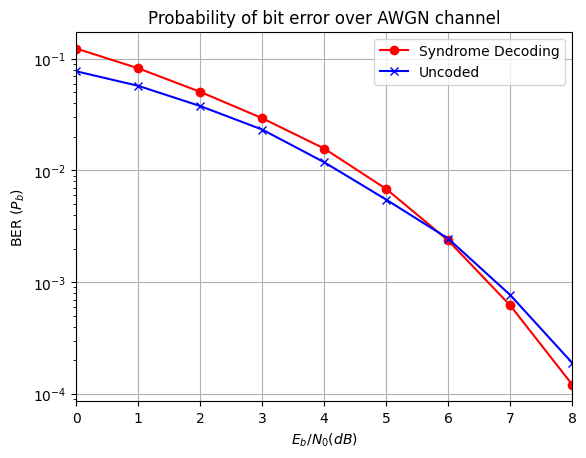

Bit Error Rate: [1.233750e-01 8.212500e-02 5.056250e-02 2.937500e-02 1.572500e-02
 6.843750e-03 2.365000e-03 6.212500e-04 1.216875e-04]


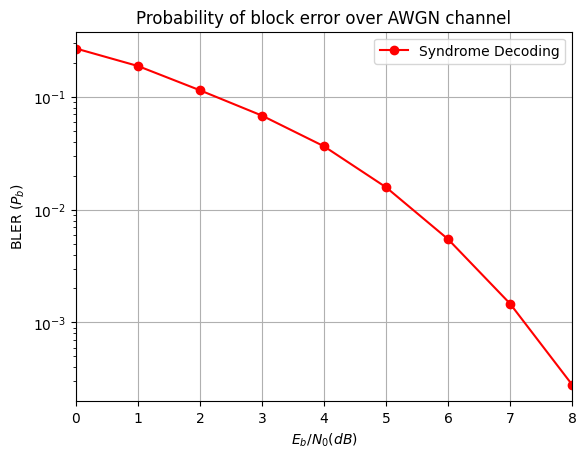

Symbol Error Rate: [0.26725  0.187    0.114    0.068    0.036375 0.01578  0.005475 0.00147
 0.000282]


In [51]:
# SNR setting
SNR_start = 0
SNR_end = 8
step_size = 1
SNR = np.arange(SNR_start,SNR_end+1,step_size)
length_SNR = len(SNR)
BLER = np.zeros(length_SNR)
BER = np.zeros(length_SNR)

# The folder path where you put the codeword
# path = "absolute_file_path_on_Drive"
path = "/content/drive/MyDrive/ai_lab_wc/codework/"


# main
for i in range(length_SNR):
  fname = path+"codeword_file_SNR="+str(SNR[i])+".csv"

  # type your own code (apply the defined function)
  # load codeword
  y, m, file_size = load_codebook(fname)
  # hard decision
  d_hat = hard_decision(y)
  # syndrome decoding
  m_hat = syndrome_decode(d_hat)
  # print(m_hat.shape)
  # calculate error
  block_err, bit_err = calculate_error(m_hat,m)

  BER[i] = bit_err/4.0/file_size
  BLER[i] = block_err/file_size
  print(i,"/",len(SNR)-1)
# Fig Plot
# Compare with uncoded
BER_uncoded = [0.07721, 0.05723, 0.03774, 0.02324, 0.01186, 0.00549, 0.00246, 0.00077, 0.00019]
EbN0dBs = np.arange(start=SNR_start,stop=SNR_end+1,step=step_size)
fig1 = plt.figure()
plt.semilogy(EbN0dBs,BER,color='r',marker='o',linestyle='-',label='Syndrome Decoding')
plt.semilogy(EbN0dBs,BER_uncoded,color='b',marker='x',linestyle='-',label='Uncoded')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BER ($P_b$)')
plt.title('Probability of bit error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Bit Error Rate:", BER)
fig2 = plt.figure()
plt.semilogy(EbN0dBs,BLER,color='r',marker='o',linestyle='-',label='Syndrome Decoding')
plt.xlabel('$E_b/N_0(dB)$');plt.ylabel('BLER ($P_b$)')
plt.title('Probability of block error over AWGN channel')
plt.xlim(SNR_start,SNR_end);plt.grid(True);
plt.legend()
plt.show()
print("Symbol Error Rate:", BLER)
#print("Your name and the date you demo.")